1. Importation des bibliothéques et chargement de données 

Installer "pandas"

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Importer "pandas"

In [3]:
import pandas as pd

In [5]:
pd.set_option("display.max_columns",None)

Importation du fichier

In [7]:
data=df = pd.read_excel("documents/projet_airline/data/airlines_reviews1.xlsx")


In [9]:
df=data.copy()

Afficher les premieres lignes de la table

In [11]:
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01 00:00:00,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4.0,4.0,4.0,4.0,4.0,9.0,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21 00:00:00,Singapore Airlines,True,¬†¬†Booking an emergency exit seat still meant...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5.0,3.0,4.0,4.0,1.0,3.0,no
2,Food was plentiful and tasty,S Han,2024-02-20 00:00:00,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1.0,5.0,2.0,1.0,5.0,10.0,yes
3,‚Äúhow much food was available,D Laynes,2024-02-19 00:00:00,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5.0,5.0,5.0,5.0,5.0,10.0,yes
4,‚Äúservice was consistently good‚Äù,A Othman,2024-02-19 00:00:00,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5.0,5.0,5.0,5.0,5.0,10.0,yes


Suppression des colonnes "Unnamed"

In [13]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [15]:
print(df)

                                     Title              Name  \
0                       Flight was amazing  Alison Soetantyo   
1     seats on this aircraft are dreadful      Robert Watson   
2             Food was plentiful and tasty             S Han   
3           ‚Äúhow much food was available          D Laynes   
4      ‚Äúservice was consistently good‚Äù         A Othman    
...                                    ...               ...   
6016               the worst Asian airline          G Nazano   
6017         I felt like a valued customer        V Anderson   
6018  I was satisfied with the performance             F Lee   
6019                  an uneventful flight         N Vickers   
6020               didn‚Äôt offer anything           C Clark   

              Review Date             Airline Verified  \
0     2024-03-01 00:00:00  Singapore Airlines     True   
1     2024-02-21 00:00:00  Singapore Airlines     True   
2     2024-02-20 00:00:00  Singapore Airlines     True   

2. Overview of dataset

In [17]:
df.shape

(6021, 17)

La base de données contient 6021 lignes et 17 colonnes. 

In [20]:
df.dtypes

Title                      object
Name                       object
Review Date                object
Airline                    object
Verified                   object
Reviews                    object
Type of Traveller          object
Month Flown                object
Route                      object
Class                      object
Seat Comfort              float64
Staff Service             float64
Food & Beverages          float64
Inflight Entertainment    float64
Value For Money           float64
Overall Rating            float64
Recommended                object
dtype: object

Y-a-t-il des duplicatas ? 

In [22]:
duplicates = df.duplicated() # Vérifier les duplicatas
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6016    False
6017    False
6018    False
6019    False
6020    False
Length: 6021, dtype: bool


In [24]:
nombre_duplicatas = duplicates.sum() # Compter le nombre de duplicates
print(f"Nombre de duplicatas : {nombre_duplicatas}")

Nombre de duplicatas : 4


In [26]:
# Afficher les duplicatas
duplicatas_affiches = df[df.duplicated(keep=False)]  # keep=False pour afficher tous les duplicatas
print(duplicatas_affiches)

     Title Name Review Date Airline Verified Reviews Type of Traveller  \
1696   NaN  NaN         NaN     NaN      NaN     NaN               NaN   
1925   NaN  NaN         NaN     NaN      NaN     NaN               NaN   
1946   NaN  NaN         NaN     NaN      NaN     NaN               NaN   
1949   NaN  NaN         NaN     NaN      NaN     NaN               NaN   
3299   NaN  NaN         NaN     NaN      NaN     NaN               NaN   

     Month Flown Route Class  Seat Comfort  Staff Service  Food & Beverages  \
1696         NaN   NaN   NaN           NaN            NaN               NaN   
1925         NaN   NaN   NaN           NaN            NaN               NaN   
1946         NaN   NaN   NaN           NaN            NaN               NaN   
1949         NaN   NaN   NaN           NaN            NaN               NaN   
3299         NaN   NaN   NaN           NaN            NaN               NaN   

      Inflight Entertainment  Value For Money  Overall Rating Recommended  
1696

In [28]:
# Supprimer les duplicatas
df_sans_duplicatas = df.drop_duplicates()
print(df_sans_duplicatas)

                                     Title              Name  \
0                       Flight was amazing  Alison Soetantyo   
1     seats on this aircraft are dreadful      Robert Watson   
2             Food was plentiful and tasty             S Han   
3           ‚Äúhow much food was available          D Laynes   
4      ‚Äúservice was consistently good‚Äù         A Othman    
...                                    ...               ...   
6016               the worst Asian airline          G Nazano   
6017         I felt like a valued customer        V Anderson   
6018  I was satisfied with the performance             F Lee   
6019                  an uneventful flight         N Vickers   
6020               didn‚Äôt offer anything           C Clark   

              Review Date             Airline Verified  \
0     2024-03-01 00:00:00  Singapore Airlines     True   
1     2024-02-21 00:00:00  Singapore Airlines     True   
2     2024-02-20 00:00:00  Singapore Airlines     True   

In [30]:
# Compter les valeurs nulles par colonne

null_counts = df.isnull().sum()

In [32]:
# Calculer la proportion de valeurs nulles 
proportion_nulls = (null_counts / df.shape[0]) * 100 

# Afficher la proportion de valeurs nulles 
print(proportion_nulls)

Title                     0.149477
Name                      0.232520
Review Date               0.199302
Airline                   0.166085
Verified                  0.215911
Reviews                   0.166085
Type of Traveller         5.696728
Month Flown               5.696728
Route                     5.696728
Class                     5.696728
Seat Comfort              5.696728
Staff Service             5.696728
Food & Beverages          5.696728
Inflight Entertainment    5.696728
Value For Money           5.696728
Overall Rating            5.696728
Recommended               5.713337
dtype: float64


Visualisation des valeurs manquantes 

In [34]:
import matplotlib.pyplot as plt # Visualisation 

In [36]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [38]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [40]:
import missingno as msno # Visualisation des valeurs manquantes 

<Axes: >

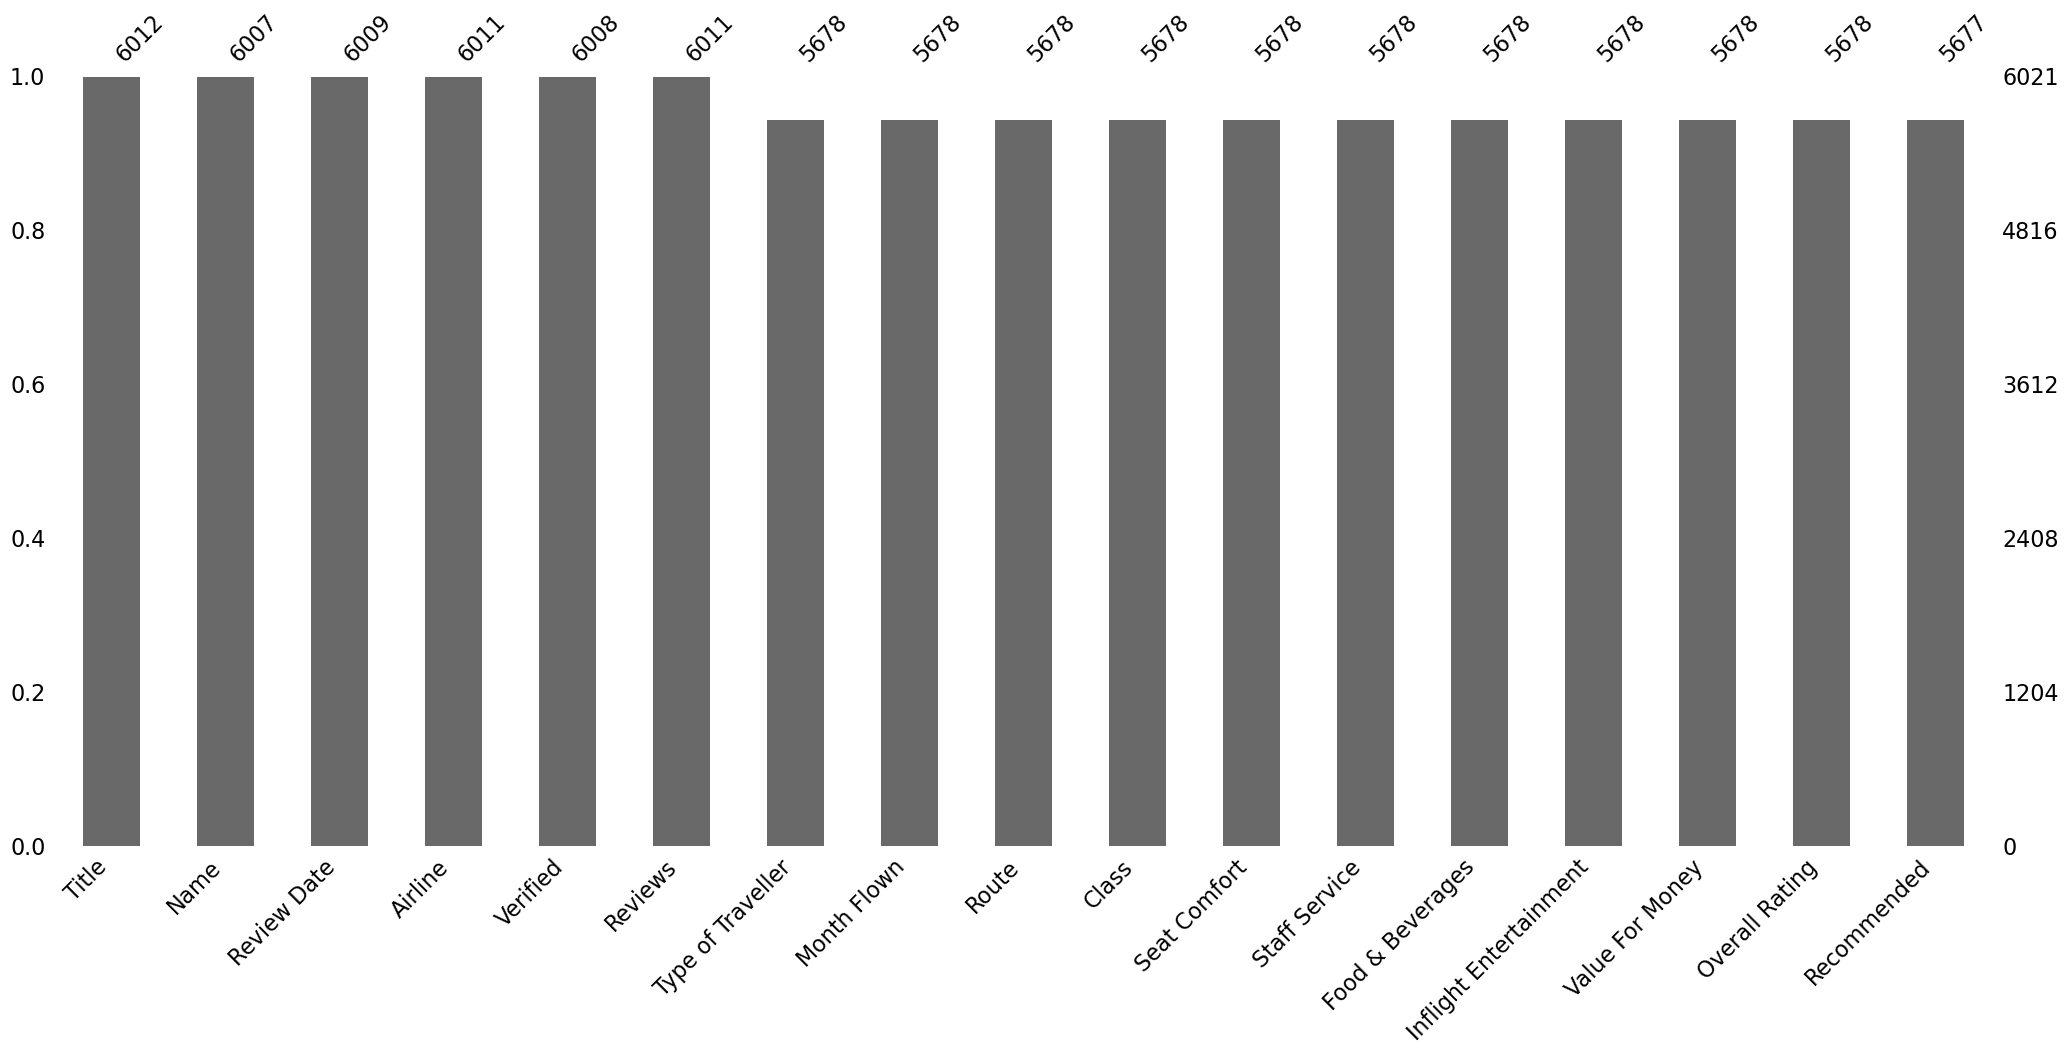

In [42]:
msno.bar(df)

In [44]:
df.drop(["Title", "Name", "Review Date"], axis=1, inplace=True)

b) Gérer les valeurs manquantes

On va regrouper tous les colonnes pour ensuite rajouter "Unknown" : 

In [46]:
# Remplacer les valeurs manquantes par "Unknown" dans les colonnes spécifiées
columns_to_replace = ["Airline", "Verified", "Reviews", "Type of Traveller", 
                      "Month Flown", "Route", "Class", "Seat Comfort", 
                      "Staff Service", "Food & Beverages", 
                      "Inflight Entertainment", "Value For Money", 
                      "Overall Rating", "Recommended"]

def replace_null_values(df, columns):
    default_value = "Unknown"
    for column in columns:
        df[column].fillna(default_value, inplace=True)



Maintenant, on va vérifier : 

In [48]:
df.isnull().sum()

Airline                    10
Verified                   13
Reviews                    10
Type of Traveller         343
Month Flown               343
Route                     343
Class                     343
Seat Comfort              343
Staff Service             343
Food & Beverages          343
Inflight Entertainment    343
Value For Money           343
Overall Rating            343
Recommended               344
dtype: int64

C) Gérer les valeurs négatives 

Dans cette partie, nous allons vérifier les valeurs négatives. 

In [50]:
# Afficher les colonnes numériques 

display(df.select_dtypes(int).columns)
df.select_dtypes(float).columns


Index([], dtype='object')

Index(['Seat Comfort', 'Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Overall Rating'],
      dtype='object')

Nous allons créer une liste avec les colonnes numériques. Mais on va d'abord convertir les colonnes en type numérique car mes valeurs sont stockées en tant que chaînes de caractères (texte). Mon code précédent montre que mes colonnes sont des "objets". 

In [52]:
# Colonnes numériques à vérifier 
cols_to_check = ["Seat Comfort", "Staff Service", "Food & Beverages", 
                 "Inflight Entertainment", "Value For Money", "Overall Rating"]

# Convertir les colonnes en types numériques
for col in cols_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérifier si la conversion a réussi
print(df[cols_to_check].dtypes)


Seat Comfort              float64
Staff Service             float64
Food & Beverages          float64
Inflight Entertainment    float64
Value For Money           float64
Overall Rating            float64
dtype: object


On va créer une liste avec ces colonnes numériques. 

In [54]:
# Colonnes numériques à vérifier 
cols_to_check = [ "Seat Comfort", "Staff Service", "Food & Beverages", 
                 "Inflight Entertainment", "Value For Money", "Overall Rating"]

# Vérifier que toutes les colonnes sont numériques
numeric_cols_to_check = df[cols_to_check].select_dtypes(include=['number']).columns

# Vérifier s'il y a des colonnes non numériques
non_numeric_cols = [col for col in cols_to_check if col not in numeric_cols_to_check]

if non_numeric_cols:
    print(f"Les colonnes suivantes ne sont pas numériques et seront ignorées : {non_numeric_cols}")

# Fonction pour vérifier les valeurs négatives
def check_negative_values(df, columns_to_check):
    negative_values = df[columns_to_check].lt(0).sum()
    return negative_values

# Appeler la fonction avec seulement les colonnes numériques
negative_values_result = check_negative_values(df, numeric_cols_to_check)

# Afficher le résultat
print("Valeurs négatives par colonne :")
print(negative_values_result)

Valeurs négatives par colonne :
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
dtype: int64


On va enregistrer le DataFrame nettoyé : 

In [56]:
# Enregistrer le DataFrame nettoyé dans un nouveau fichier Excel
df.to_excel("airline_review_nettoye.xlsx", index=False)


4. Visualisation rapide des notes des passagers

Ce code permet de corriger les espaces présents dans les titres présent dans la colonne "Airline"

In [58]:
df["Airline"] = df["Airline"].str.strip().str.title()

Calculer la moyenne par compagnies : 

Classement des compagnies par note moyenne :
 Airline
All Nippon Airways        7.758242
Eva Air                   7.113990
Qatar Airways             7.112026
Japan Airlines            6.888158
Singapore Airlines        6.563338
Korean Air                6.116667
Cathay Pacific Airways    6.099010
Air France                4.681338
Emirates                  4.411633
Turkish Airlines          3.576401
Name: Overall Rating, dtype: float64


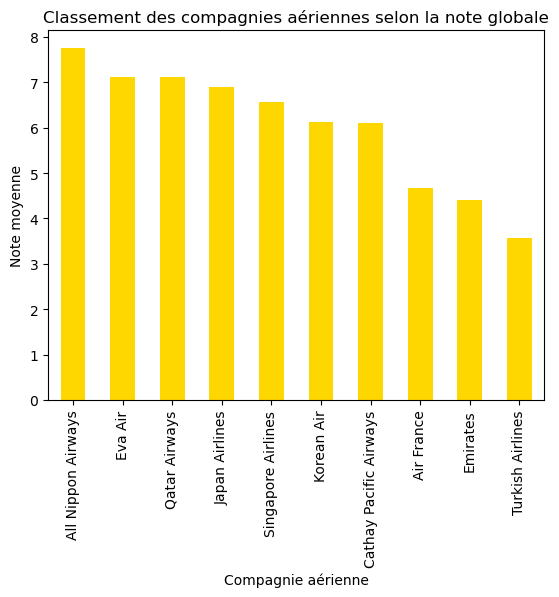

In [60]:
# Calcul de la note globale moyenne pour chaque compagnie
overall_ranking = df.groupby('Airline')['Overall Rating'].mean().sort_values(ascending=False)
print("Classement des compagnies par note moyenne :\n", overall_ranking)

# Visualisation du classement
overall_ranking.plot(kind='bar', color='gold')
plt.title("Classement des compagnies aériennes selon la note globale")
plt.xlabel("Compagnie aérienne")
plt.ylabel("Note moyenne")
plt.show()

Résultat : 
- "All Nippon Airways" obtient la première place avec une note globale de 7,75 sur 10.
- "Eva Air" obtient la deuxième place avec une note globale de 7,11 sur 10.
- "Emirates" et "Turkish Airlines" obtiennent la deux dernières places avec une note globale de 4,41 et 3,57 sur 10. 

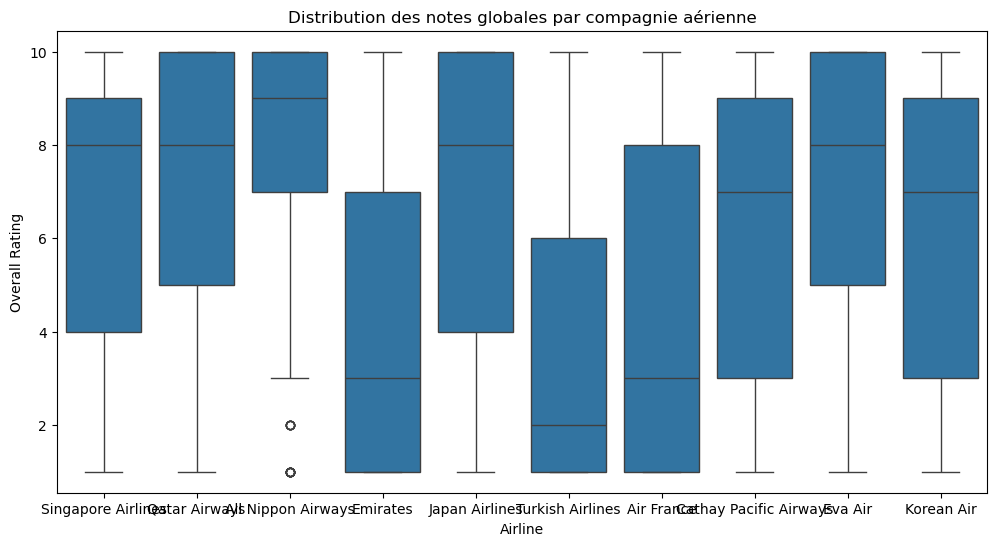

In [150]:
import seaborn as sns

# Visualisation de la distribution des notes par compagnie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Overall Rating')
plt.title('Distribution des notes globales par compagnie aérienne')
plt.show()




Résultat : Ce boxplot montre la distribution des notes globales attribuées à plusieurs compagnies aériennes.

Qatar Airways et All Nippon Airways ont des notes globales élevées, avec une médiane proche de 9 ou plus, et peu de variation autour de cette note.

Emirates et Air France ont des notes globales plus basses, avec une médiane autour de 5. Emirates a une plage de variation plus large, ce qui indique une diversité d'opinions parmi les clients.

Singapore Airlines, Turkish Airlines, Cathay Pacific Airways, Eva Air, et Korean Air se situent entre les deux, avec des notes médianes autour de 7-8.

Pour All Nippon Airways, il y a deux valeurs aberrantes (en dessous de 4), indiquant que certains passagers ont donné des notes très basses, bien que la majorité des notes soient élevées.



Recommendation : 

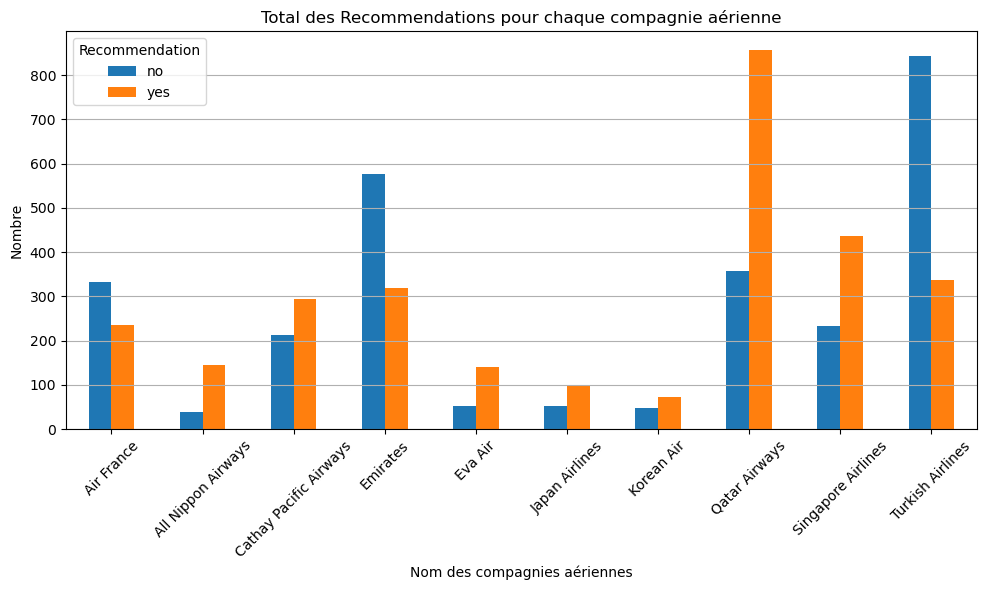

In [152]:
recommendation_counts = df.groupby(['Airline', 'Recommended']).size().unstack(fill_value=0)
recommendation_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Total des Recommendations pour chaque compagnie aérienne')
plt.xlabel('Nom des compagnies aériennes') 
plt.ylabel('Nombre')
plt.xticks(rotation=45) 
plt.legend(title='Recommendation')
plt.grid(axis='y')
plt.tight_layout()
plt.show()                                                

Dans notre analyse des recommandations, nous pouvons observer que Qatar Airways est recommendée positivement par les passagers. Néanmoins, Turkish Airlines, Emirates et Air France sont recommendées négativement à plusieurs reprises. 

Analyse de la corrélation :


In [154]:
correlation = df['Overall Rating'].corr(df['Value For Money'])
print(correlation)

0.8921954150372414


In [156]:
subset_data = df[['Overall Rating', 'Value For Money']]

correlation_matrix = subset_data.corr()
print(correlation_matrix)

                 Overall Rating  Value For Money
Overall Rating         1.000000         0.892195
Value For Money        0.892195         1.000000


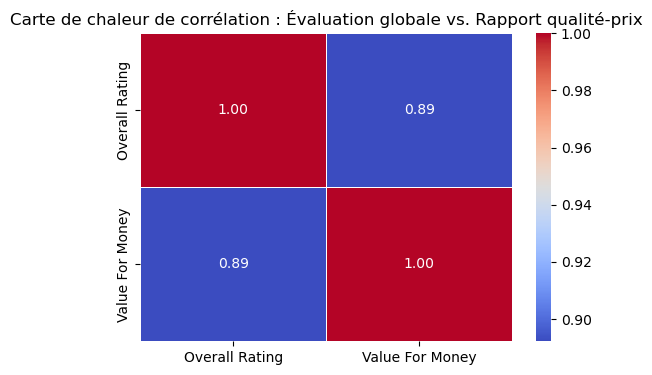

In [158]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Carte de chaleur de corrélation : Évaluation globale vs. Rapport qualité-prix')
plt.show()

In [160]:
subset_data = df[['Overall Rating', 'Value For Money', 'Seat Comfort', 'Food & Beverages', 'Inflight Entertainment', 'Staff Service']]

correlation_matrix = subset_data.corr()
print(correlation_matrix)

                        Overall Rating  Value For Money  Seat Comfort  \
Overall Rating                1.000000         0.892195      0.205755   
Value For Money               0.892195         1.000000      0.185315   
Seat Comfort                  0.205755         0.185315      1.000000   
Food & Beverages              0.164034         0.158362      0.128662   
Inflight Entertainment        0.138617         0.133283      0.132516   
Staff Service                 0.225201         0.200695      0.169694   

                        Food & Beverages  Inflight Entertainment  \
Overall Rating                  0.164034                0.138617   
Value For Money                 0.158362                0.133283   
Seat Comfort                    0.128662                0.132516   
Food & Beverages                1.000000                0.143722   
Inflight Entertainment          0.143722                1.000000   
Staff Service                   0.153728                0.122270   

           

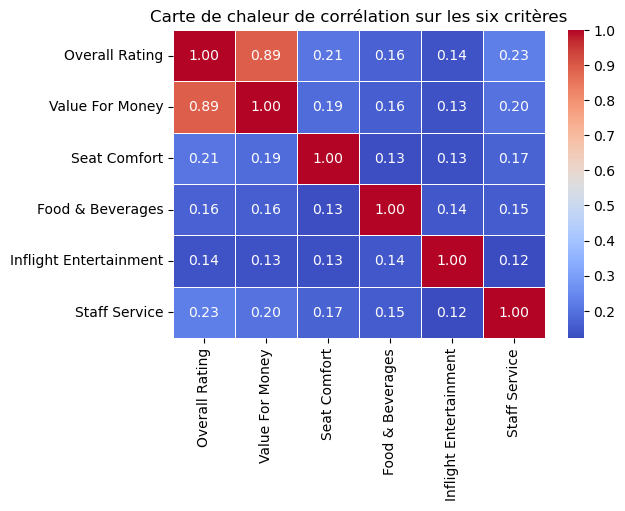

In [162]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Carte de chaleur de corrélation sur les six critères')
plt.show()

Analyse des notes médiannes par classe : 

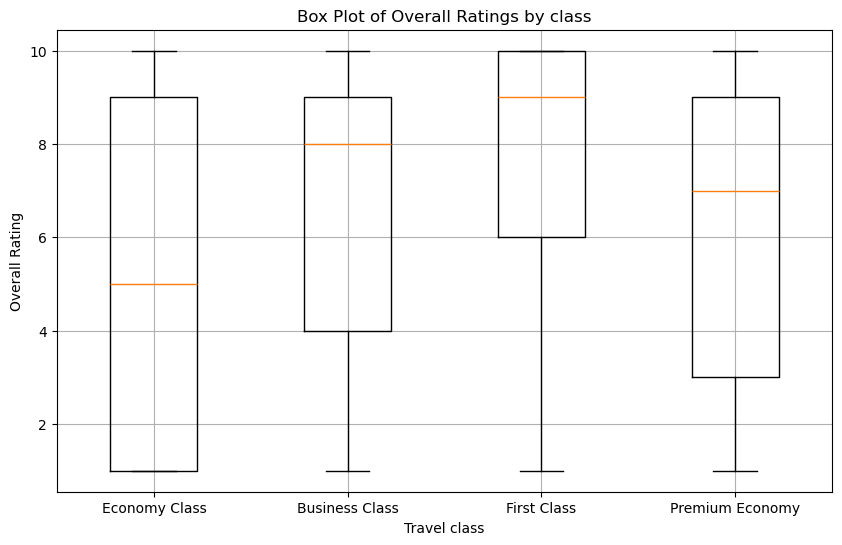

In [164]:
import matplotlib.pyplot as plt

# Création du boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([
    df[df['Class'] == 'Economy Class']['Overall Rating'], 
    df[df['Class'] == 'Business Class']['Overall Rating'], 
    df[df['Class'] == 'First Class']['Overall Rating'], 
    df[df['Class'] == 'Premium Economy']['Overall Rating']],

    labels=['Economy Class', 'Business Class', 'First Class', 'Premium Economy'])

# Ajout des titres
plt.title('Box Plot of Overall Ratings by class')
plt.xlabel('Travel class')
plt.ylabel('Overall Rating')
plt.grid(True)

# Affichage du graphique
plt.show()

Test d'hypothese : 

In [170]:
import pandas as pd
from scipy.stats import median_test

# Test médiane 
statistic, p_value, median, table = median_test(
    df[df['Class'] == 'Business Class']['Overall Rating'],
    df[df['Class'] == 'Premium Economy']['Overall Rating'],
    df[df['Class'] == 'Economy Class']['Overall Rating'],
    df[df['Class'] == 'First Class']['Overall Rating']
)

print("Chi-squared statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Les notes médianes des différentes classes présentent des différences statistiques.")
else:
    print("Il n'y a pas suffisamment de preuves pour conclure que les notes médianes parmi les classes de voyage sont statistiquement différentes.")


Chi-squared statistic: 159.63244044402268
p-value: 2.2001490603606376e-34
Les notes médianes des différentes classes présentent des différences statistiques.


Analyse des notes médianes par type de voyage : 

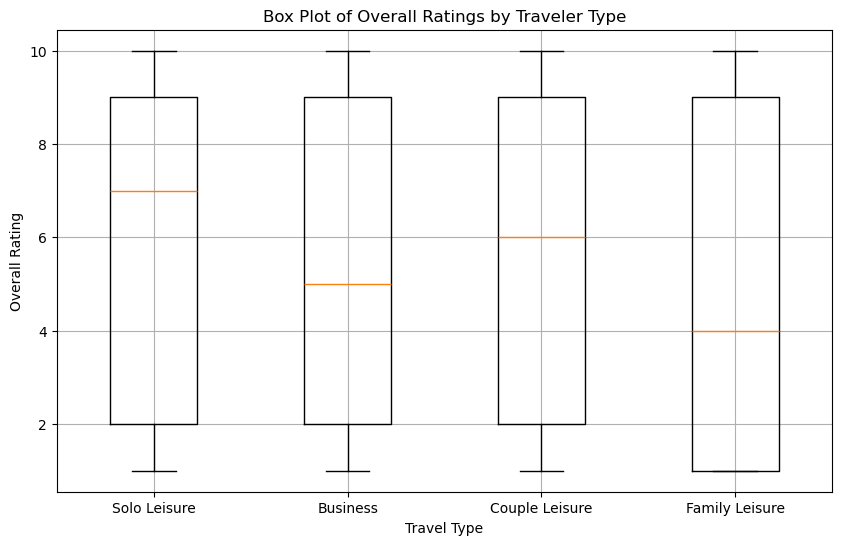

In [174]:
import matplotlib.pyplot as plt

# Création du boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([
    df[df['Type of Traveller'] == 'Solo Leisure']['Overall Rating'], 
    df[df['Type of Traveller'] == 'Business']['Overall Rating'], 
    df[df['Type of Traveller'] == 'Couple Leisure']['Overall Rating'], 
    df[df['Type of Traveller'] == 'Family Leisure']['Overall Rating']],

    labels=['Solo Leisure', 'Business', 'Couple Leisure', 'Family Leisure'])

# Ajout des titres
plt.title('Box Plot of Overall Ratings by Traveler Type')
plt.xlabel('Travel Type')
plt.ylabel('Overall Rating')
plt.grid(True)

# Affichage du graphique
plt.show()

Test d'hypothèse par type de voyage : 

In [176]:
import pandas as pd
from scipy.stats import median_test

# Test médiane 
statistic, p_value, median, table = median_test(
   df[df['Type of Traveller'] == 'Solo Leisure']['Overall Rating'], 
    df[df['Type of Traveller'] == 'Business']['Overall Rating'], 
    df[df['Type of Traveller'] == 'Couple Leisure']['Overall Rating'], 
    df[df['Type of Traveller'] == 'Family Leisure']['Overall Rating'])

print("Chi-squared statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Les notes médianes des types de voyage présentent des différences statistiques.")
else:
    print("Il n'y a pas suffisamment de preuves pour conclure que les notes médianes parmi les types de voyage sont statistiquement différentes.")


Chi-squared statistic: 68.29623031140925
p-value: 9.88610716258598e-15
Les notes médianes des types de voyage présentent des différences statistiques.


Analyse des sentiments : 

Airline
Air France                0.098714
All Nippon Airways        0.218761
Cathay Pacific Airways    0.147186
Emirates                  0.093559
Eva Air                   0.233835
Japan Airlines            0.195425
Korean Air                0.163446
Qatar Airways             0.215551
Singapore Airlines        0.166929
Turkish Airlines          0.045920
Name: Recommended Sentiment, dtype: float64


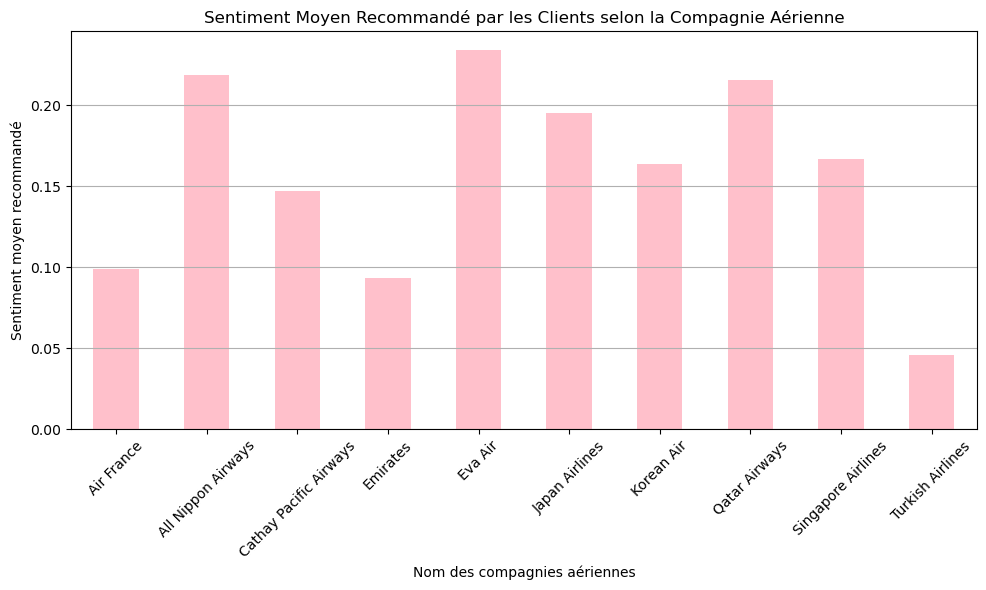

In [200]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Calcul du sentiment recommandé
df['Recommended Sentiment'] = df['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Calcul de la moyenne des sentiments recommandés pour chaque compagnie aérienne
avg_recommended_sentiment = df.groupby('Airline')['Recommended Sentiment'].mean()

# Vérification des valeurs manquantes
if avg_recommended_sentiment.isnull().any():
    print("Avertissement : Il y a des valeurs manquantes dans la moyenne des sentiments recommandés.")

# Affichage de la moyenne des sentiments recommandés
print(avg_recommended_sentiment)

# Graphique
plt.figure(figsize=(10, 6))
avg_recommended_sentiment.plot(kind='bar', color='pink')
plt.title('Sentiment Moyen Recommandé par les Clients selon la Compagnie Aérienne')
plt.xlabel('Nom des compagnies aériennes')
plt.ylabel('Sentiment moyen recommandé')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.grid(axis='y')
plt.tight_layout()
plt.show()  


